<a href="https://colab.research.google.com/github/mariaedfarias/Object-Detection/blob/main/Detec%C3%A7%C3%A3o_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Instalando a biblioteca do Kaggle para baixar conjuntos de dados
!pip install kaggle




In [14]:
#Importando bibliotecas
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
#Upload do arquivo kaggle.json (chave da API Kaggle)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mariaeduardafarias","key":"9efcfad44efc1b005847817d49bde5b9"}'}

In [16]:
#Alocando a arquivo kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [17]:
#Caso arquivo kaggle.json não seja alocado adequadamente
if 'kaggle.json' not in os.listdir():
    raise FileNotFoundError("O arquivo kaggle.json não foi encontrado. Faça upload do arquivo e tente novamente.")

In [18]:
#Baixando conjuntos de dados "Fruits-classification"
!kaggle datasets download -d utkarshsaxenadn/fruits-classification

fruits-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
#Salvando pasta do kaggle
from google.colab import files
uploaded = files.upload()


Saving archive (6).zip to archive (6).zip


In [20]:
#Importando pasta zip
import zipfile

#Arquivo zip do conjunto de dados
nome_arquivo_zip = "fruits-classification.zip"

#Diretório onde os arquivos serão extraídos
diretorio_extracao = "\content"


In [21]:
#Extraindo arquivo zip
with zipfile.ZipFile("fruits-classification.zip", "r") as zip_ref:
    zip_ref.extractall("\content")

In [22]:
#Carregando os dados
dados = tf.keras.utils.image_dataset_from_directory(
    '/content/\content/Fruits Classification/train',
    labels='inferred',
    label_mode='int',  # Se os rótulos são representados como números inteiros
    image_size=(224, 224),
    batch_size=32
)

#Dividindo os dados em treino e teste
train_size = int(0.8 * len(dados))
train_dataset = dados.take(train_size)
test_dataset = dados.skip(train_size)

#Extraindo os rótulos
class_names = dados.class_names

#Pré-processamento dos dados
def preprocess_data(image, label):
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_dataset = train_dataset.map(preprocess_data)
test_dataset = test_dataset.map(preprocess_data)


Found 9700 files belonging to 5 classes.


In [23]:
#Número de classes
num_classes = 5

#Importando a arquitetura VGG16 pré-treinada
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Congelando as camadas convolucionais para evitar que sejam treinadas novamente
base_model.trainable = False

#Criando o modelo sequencial
model = tf.keras.Sequential([
    base_model,  # Adicionar a arquitetura VGG16 como uma camada base
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 'num_classes' é o número de classes de saída
])

#Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' se os rótulos forem codificados como one-hot
              metrics=['accuracy'])

#Resumo do modelo
model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 14780997 (56.39 MB)
Trainable params: 66309

In [ ]:
#Treinando o modelo
history = model.fit(train_dataset, epochs=2, validation_data=test_dataset)

Epoch 1/2
 29/243 [==>...........................] - ETA: 45:48 - loss: 0.6888 - accuracy: 0.7565

In [25]:
#Testando o modelo
test_loss, test_acc = model.evaluate(test_dataset)

61/61 [==============================] - 771s 13s/step - loss: 0.5207 - accuracy: 0.8217


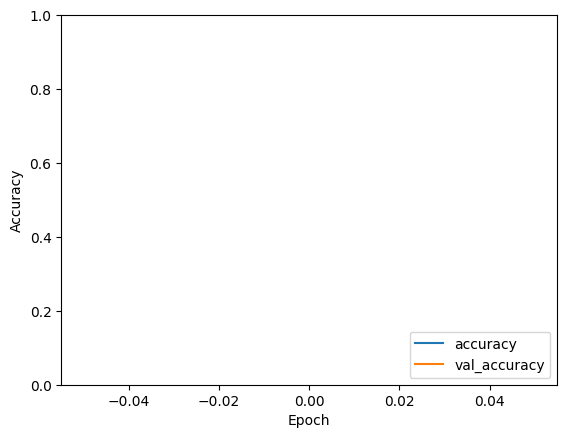

In [26]:
#Curva de aprendizado
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 375ms/step


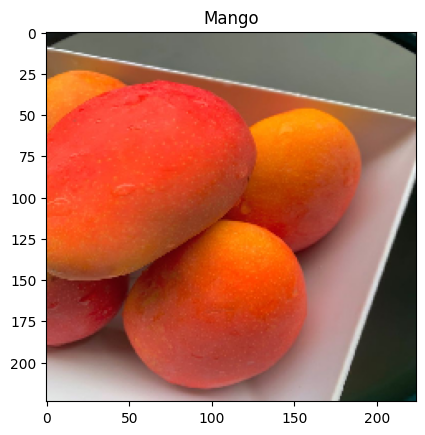

In [36]:
#Detecção de imagens
import matplotlib.pyplot as plt
import numpy as np
#Carregar a imagem para detecção
image_path = "/content/MANGA-FOTO.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

#Pré-processamento da imagem
image_array = tf.keras.applications.vgg16.preprocess_input(image_array)

#Predição da imagem
predictions = model.predict(image_array)

#Índice da classe com maior probabilidade
predicted_class_index = np.argmax(predictions)

#Obtendo nome da classe
predicted_class_name = class_names[predicted_class_index]

#Exibindo a imagem e o nome da classe prevista
plt.imshow(image)
plt.title(predicted_class_name)
plt.show()
